In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.fft import fft, fftfreq 
from scipy import fft
import scipy.io
from scipy import signal

from adtk.data import validate_series
from adtk.visualization import plot
import seaborn as sns

from get_Data import getSampleI



(5, 10000)
(10000,)


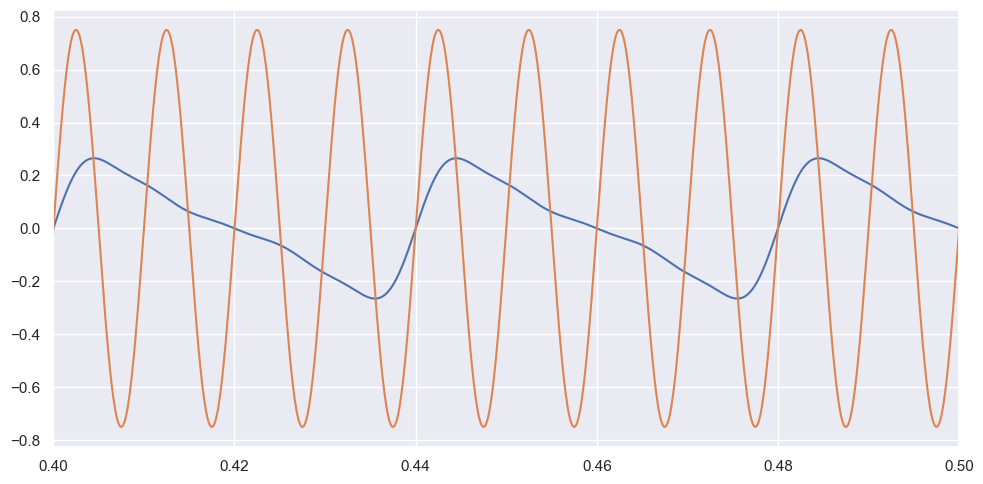

In [79]:
fs = 10000
f0 = 25
n = 8
d = 0.02
p = 0.12
t = np.linspace(0,1,fs)
zz = np.sin(2*np.pi*f0*np.array([1 ,2 ,3 ,4 ,5]).reshape(5,1)*t)/5
print(np.shape(zz))
z = np.matmul(np.array([1,0.5, 0.2, 0.1, 0.05]).reshape(1,5),zz)
z = z[0]
print(np.shape(z))
ss = np.sin(2*np.pi*100*np.array([1 ,2 ,3 ,4 ,5]).reshape(5,1)*t)
ss = (ss[0]*0.75)

sns.set(rc= {"figure.figsize": (10,5)})
fig, ax = plt.subplots()
ax.plot(t,z)
ax.plot(t,ss)
plt.xlim(0.4,0.5)
fig.tight_layout()


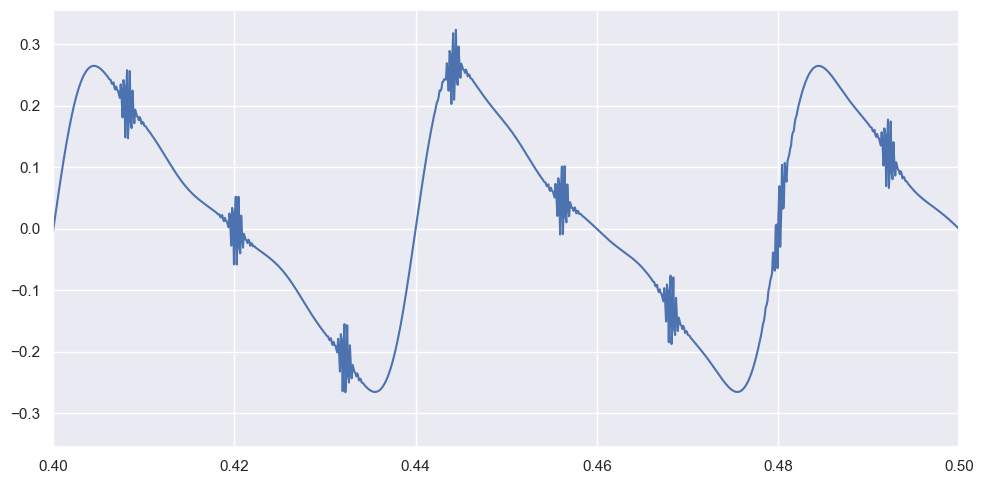

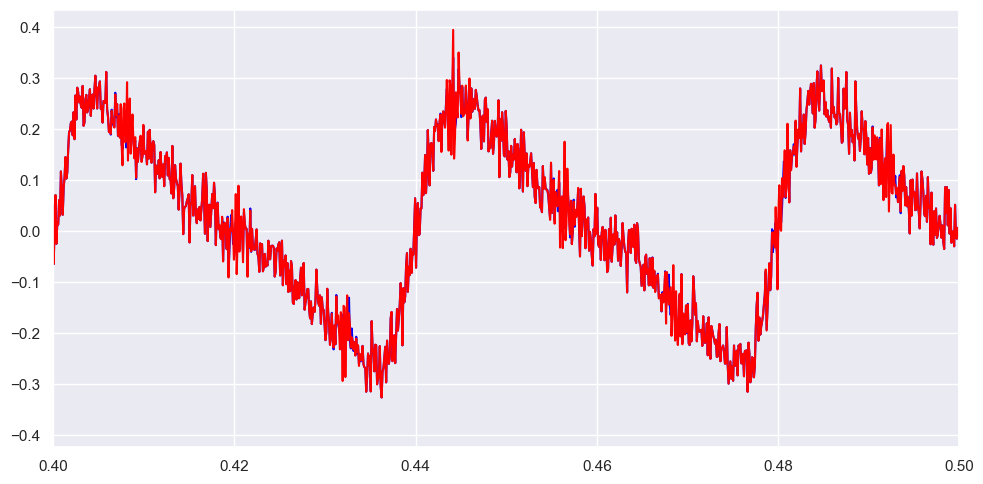

In [80]:
from scipy.signal import windows
from scipy.signal import convolve
ca = 0
bpfo = n*f0/2*(1-d/p*np.cos(ca))
fImpact = 3000
tImpact = np.linspace(0,5*10.0**(-3),50)
window = windows.flattop(len(tImpact))
xImpact = np.sin(2*np.pi*fImpact*tImpact)*window/5
#xImpact = np.array(xImpact).reshape(1,len(xImpact))
XComb = np.zeros((1,len(t)))
XComb = XComb[0]
XComb[1:len(XComb):120]=1
x = convolve(XComb,xImpact,mode="same")/3
x = x+z

fig, ax = plt.subplots()
ax.plot(t,x)
plt.xlim(0.4,0.5)
fig.tight_layout()

sigma = 30
n1 = np.random.normal(0,1,size= len(x))/sigma
n2 = np.random.normal(0,1,size= len(x))/sigma
good = n1+z
bad = n1+x

fig, ax = plt.subplots()
ax.plot(t,good,color="blue")
ax.plot(t,bad, color= "red")
plt.xlim(0.4,0.5)
fig.tight_layout()



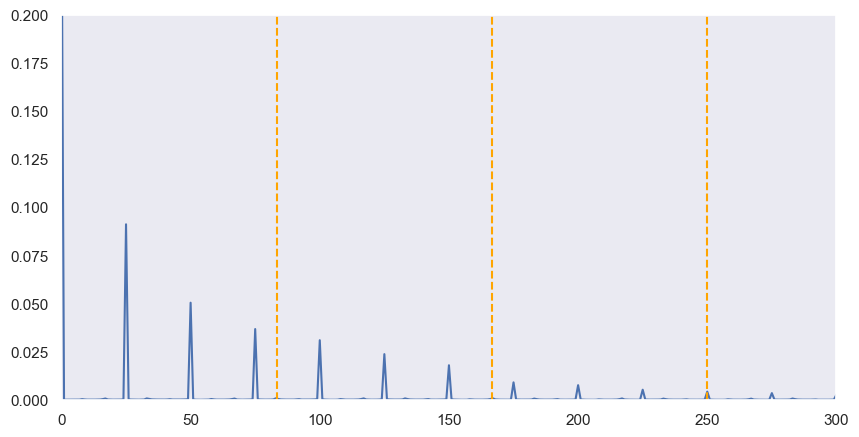

In [81]:
from scipy.fft import fft, fftfreq


def ftrans(data,freq,f0):
    N = len(data)
    T = 1.0/freq
    t = np.linspace(0.0,N*T,N,endpoint = False)
    YY = data
    #sos = sos = signal.butter(30,[1/4*freq],fs= freq,btype="low",output="sos")
    #YY = signal.sosfilt(sos,data)
    analytic_signal = signal.hilbert(YY)
    
    analytic_signal =YY
    YY= np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = (np.diff(instantaneous_phase) /(2.0*np.pi) * freq)
    yf = fft(YY)
    xf = fftfreq(N, T)[:N//2]
    #bb = np.linspace(1,25,1)*f0/1000
    bb = np.arange(1,10)*f0
    fn = np.arange(1,10)*25
    plt.plot(xf, (2.0/N * np.abs(yf[0:N//2])))
    plt.vlines(bb,0,0.4,colors="orange",linestyles="--")
    #plt.vlines(fn,0,0.4,colors="green",linestyles="--")
    plt.xlim(0,300)
    plt.ylim(0,0.2)
    plt.grid()
    plt.show()


ftrans(x,10000,bpfo)

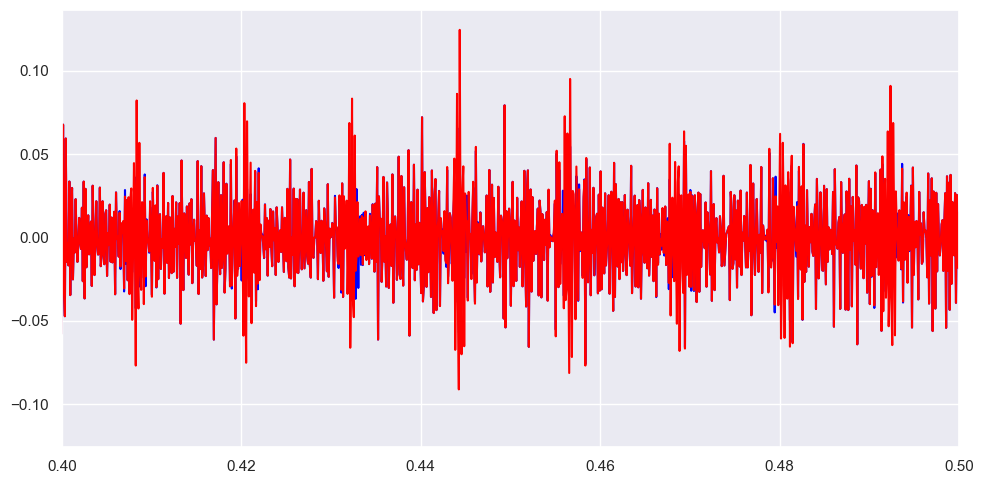

In [82]:
fr = 10000
nfil = 3
sos = signal.butter(nfil,[fr*1/4], btype="high",fs= fr,output="sos")
sfgood = signal.sosfilt(sos,good)
sfbad = signal.sosfilt(sos,bad)

fig, ax = plt.subplots()
ax.plot(t,sfgood,color="blue")
ax.plot(t,sfbad, color= "red")
plt.xlim(0.4,0.5)
fig.tight_layout()

tt = t[4000:5000]
bb = bad[4000:5000]
gg = good[4000:5000]
nn = np.array([0.4,0.33,0.25,0.2,0.15, -0.4,-0.33,-0.25,-0.2,-0.15,
               0.4,0.33,0.25,0.2,0.15, -0.1,-0.25,-0.4,-0.155,-0.3,
               0.4,0.33,0.25,0.2,0.15, -0.4,-0.33,-0.25,-0.2,-0.15,
               0.4,0.33,0.25,0.2,0.15, -0.1,-0.25,-0.4,-0.155,-0.3,
               0.4,0.33,0.25,0.2,0.15, -0.4,-0.33,-0.25,-0.2,-0.15,
               0.4,0.33,0.25,0.2,0.15, -0.1,-0.25,-0.4,-0.155,-0.3])
zeroarr = np.zeros(len(bb))
for i in range(0,len(nn)):
    zeroarr[i*16] = nn[i]
b2 = zeroarr+bb


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


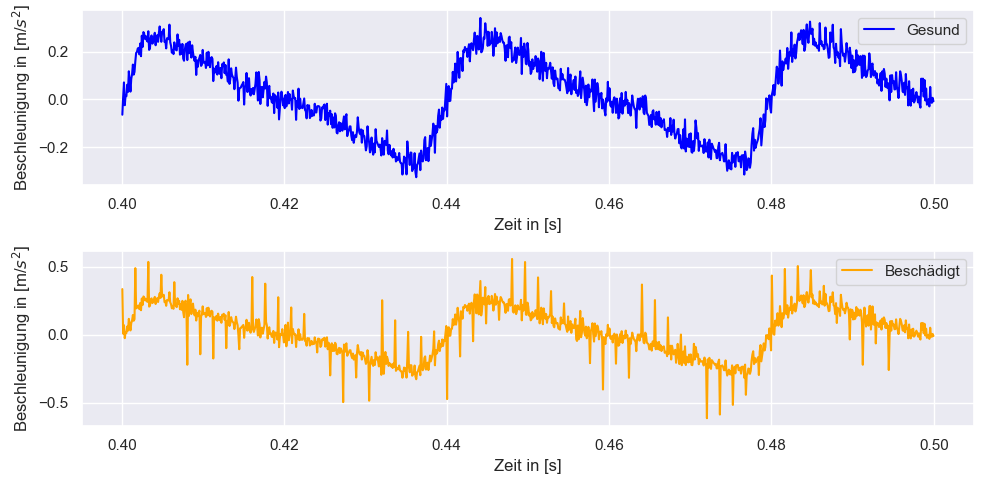

In [83]:
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(tt,gg,color="blue",label="Gesund")
ax1.set_xlabel("Zeit in [s]")
ax1.set_ylabel("Beschleunigung in [m/$s^2$]")
plt.legend()
ax2.plot(tt,b2, color= "orange",label="Beschädigt")
ax2.set_xlabel("Zeit in [s]")
ax2.set_ylabel("Beschleunigung in [m/$s^2$]")
ax1.legend()
ax2.legend()
#plt.xlim(0.4,0.5)
fig.tight_layout()
plt.show()

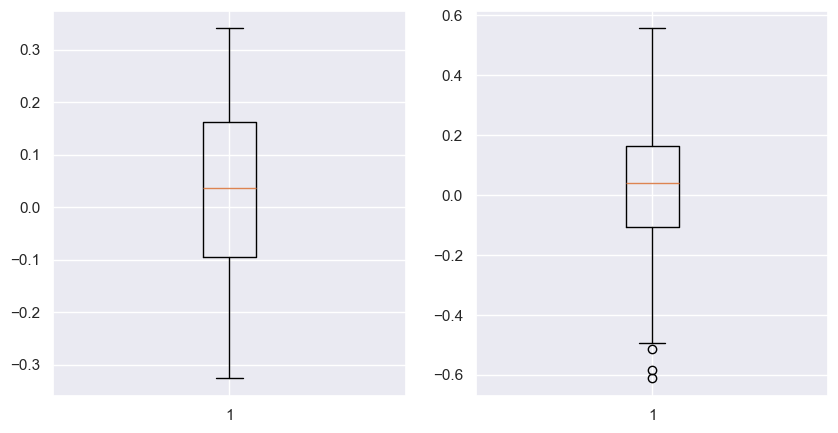

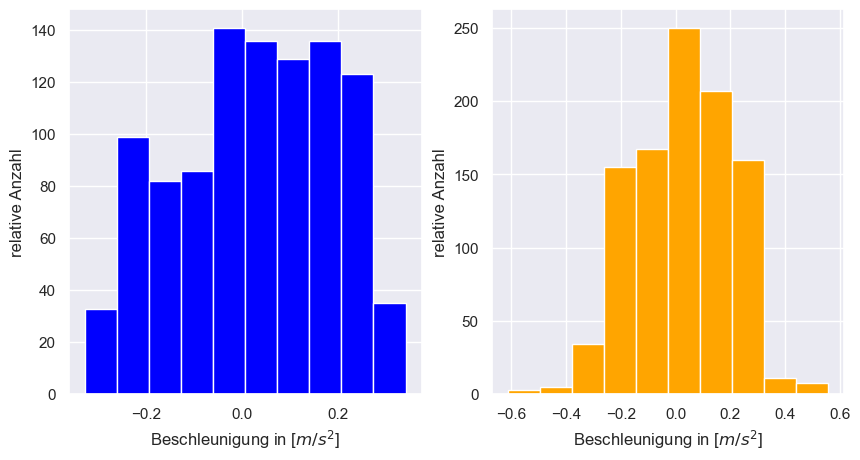

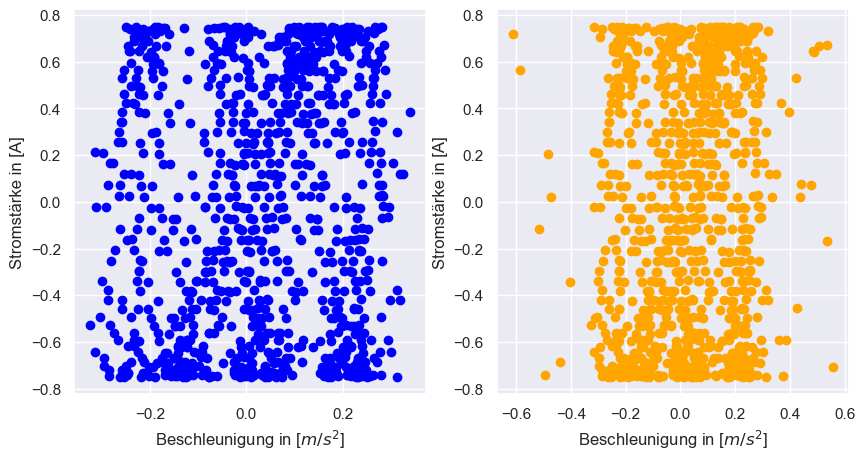

In [84]:
fig, (ax1) = plt.subplots(1,2)
ax1[0].boxplot(gg)
ax1[1].boxplot(b2)

plt.show()

fig, (ax1) = plt.subplots(1,2)
ax1[0].hist(gg,color="blue")
ax1[1].hist(b2,color="orange")
ax1[0].set_xlabel("Beschleunigung in [$m/s^2$]")
ax1[0].set_ylabel("relative Anzahl")
ax1[1].set_xlabel("Beschleunigung in [$m/s^2$]")
ax1[1].set_ylabel("relative Anzahl")
plt.show()


fig, (ax1) = plt.subplots(1,2)
ax1[0].scatter(gg,ss[4000:5000],color="blue")
ax1[1].scatter(b2,ss[4000:5000],color="orange")
ax1[0].set_xlabel("Beschleunigung in [$m/s^2$]")
ax1[0].set_ylabel("Stromstärke in [A]")
ax1[1].set_xlabel("Beschleunigung in [$m/s^2$]")
ax1[1].set_ylabel("Stromstärke in [A]")
plt.show()



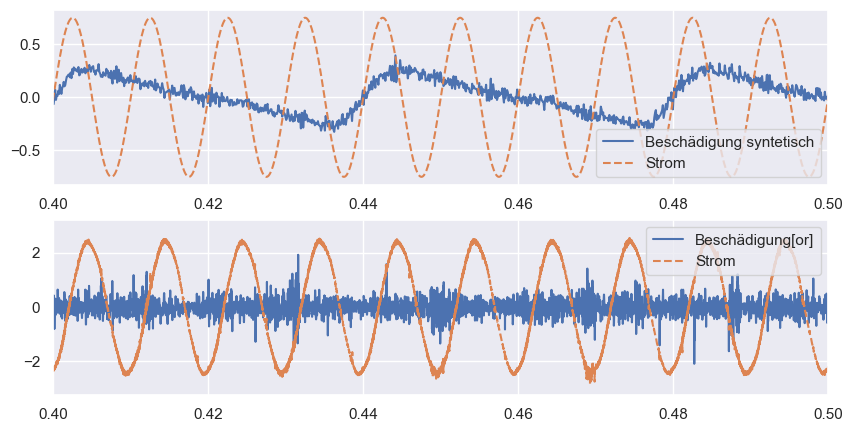

In [85]:
X, Y, I = getSampleI("bearing/KA05/","N15_M07_F10_KA05_1")

fig, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(t,bad,label="Beschädigung syntetisch")
ax1.plot(t,ss,linestyle="--",label="Strom")


ax2.plot(X,Y,label="Beschädigung[or]")
ax2.plot(X,I,linestyle="--",label="Strom")

ax1.legend()
ax2.legend()
ax1.set_xlim(0.4,0.5)
ax2.set_xlim(0.4,0.5)
plt.show()

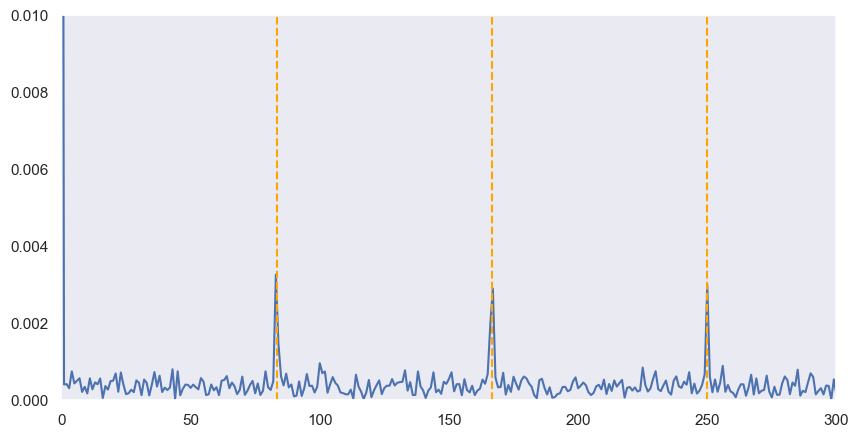

In [86]:
from scipy.fft import fft, fftfreq


def ftrans(data,freq,f0):
    N = len(data)
    T = 1.0/freq
    t = np.linspace(0.0,N*T,N,endpoint = False)
    YY = data
    #sos = sos = signal.butter(30,[1/4*freq],fs= freq,btype="low",output="sos")
    #YY = signal.sosfilt(sos,data)
    analytic_signal = signal.hilbert(YY)
    
    analytic_signal =YY
    YY= np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = (np.diff(instantaneous_phase) /(2.0*np.pi) * freq)
    yf = fft(YY)
    xf = fftfreq(N, T)[:N//2]
    #bb = np.linspace(1,25,1)*f0/1000
    bb = np.arange(1,10)*f0
    fn = np.arange(1,10)*25
    plt.plot(xf, (2.0/N * np.abs(yf[0:N//2])))
    plt.vlines(bb,0,0.4,colors="orange",linestyles="--")
    #plt.vlines(fn,0,0.4,colors="green",linestyles="--")
    plt.xlim(0,300)
    plt.ylim(0,0.01)
    plt.grid()
    plt.show()


ftrans(sfbad,10000,bpfo)
